In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# generate two class dataset
data = pd.read_csv("total 10476 - 42 variables.csv")
data.tail()

data=data.drop(['No'],axis=1)
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

(10476, 41)
(10476,)


In [3]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# # logistic regression
# model1 = LogisticRegression(C=0.01)
# # knn
# model2 = KNeighborsClassifier(n_neighbors=49)
# # RF
# model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=285)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=14, min_child_weight=8)

# ## elastic net
# ##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# # neural network
# model6 = MLPClassifier(alpha=0.001, hidden_layer_sizes=19)

# # GaussianNB
# model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

# ## 所以此处直接就是 by default 来设置

In [4]:
# # fit model
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)
# model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
# # model5.fit(X_train, y_train)
# model6.fit(X_train, y_train)
# model7.fit(X_train, y_train)

# # predict probabilities
# pred_prob1 = model1.predict_proba(X_test)
# pred_prob2 = model2.predict_proba(X_test)
# pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
# # pred_prob5 = model5.predict(X_test)
# pred_prob6 = model6.predict_proba(X_test)
# pred_prob7 = model7.predict_proba(X_test)

[13:49:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from matplotlib import cm

Text(0.5, 1.0, 'XGBoost')

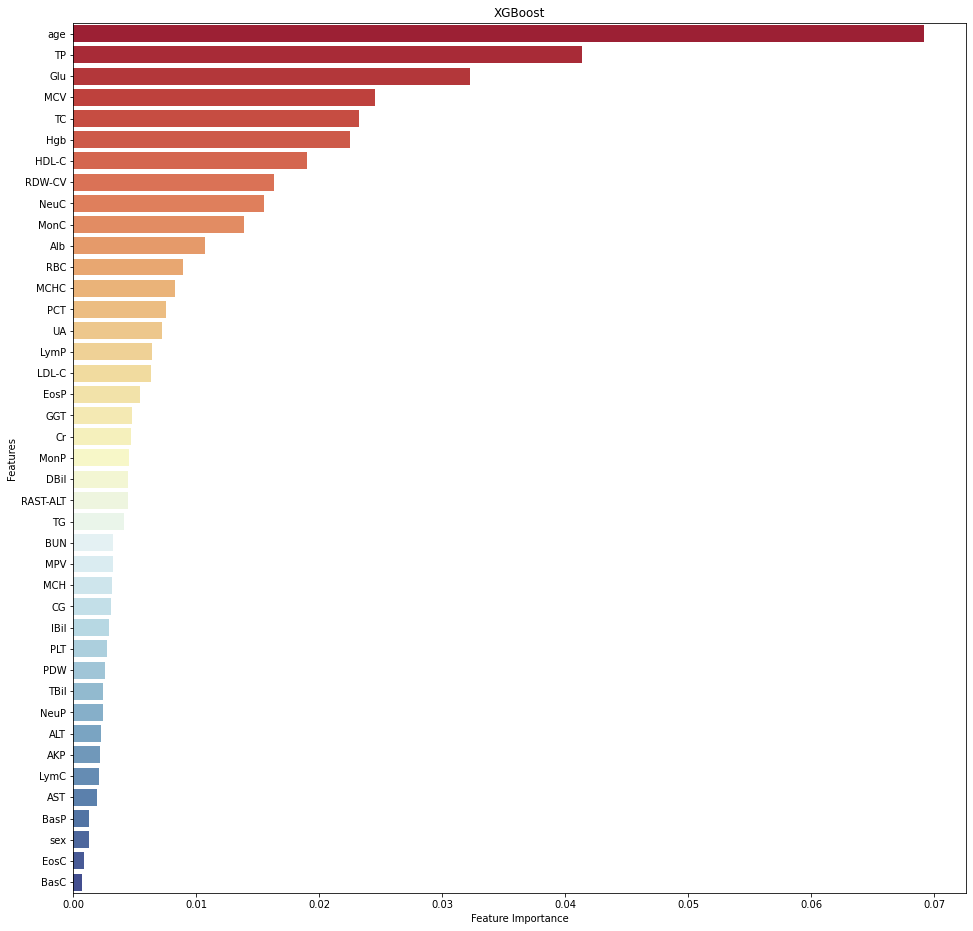

In [7]:
# 4' - XGBoost- calculate the feature importance not using default-weight, but using accuracy
results42 = permutation_importance(model4, X, y, scoring='accuracy')
# get importance
importance42 = results42.importances_mean
feat_importances42=pd.Series(importance42,index=X_features.columns)
head_lst42 = X_features.columns
importance42 = pd.DataFrame({'head':head_lst42,'importance':feat_importances42})
importance42 = importance42.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(16,16)
sns.barplot(x='importance',y='head',data=importance42,palette="RdYlBu")
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('XGBoost')